In [1]:
%%capture
%run main.ipynb

import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("df_ab_n1000_k500_v1.csv", index_col = 0) #AB network with n = 1000, k = 500

In [3]:
df.head()

,RunId,iteration,Step,mu,s,strategy,Assortativity,Average degree,links removed,AgentID,Opinion,Exposition
0,0,0,0,0.1,0.01,0.2,NaN,48.75,[],0,5.411778e-152,0.0
1,0,0,0,0.1,0.01,0.2,NaN,48.75,[],1,5.297761e-23,0.0
2,0,0,0,0.1,0.01,0.2,NaN,48.75,[],2,3.511030e-263,0.0
3,0,0,0,0.1,0.01,0.2,NaN,48.75,[],3,0.000000e+00,0.0
4,0,0,0,0.1,0.01,0.2,NaN,48.75,[],4,7.127674e-264,0.0


In [4]:
df_params = {var:df[var].unique() for var in ["mu", "s", "strategy"]}
df_params

{'mu': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 's': array([1.e-02, 1.e-01, 5.e-01, 1.e+00, 5.e+00, 1.e+01, 1.e+02]),
 'strategy': array([0.2, 0.5, 0.8])}

### Plot 1:
x: $\mu$ \
y: average opinion change \
color: s \
FIX: strategy = 0.5

In [70]:
temp = df.loc[(df["Step"].isin([0, 50])) & (df["strategy"] == 0.5), :].groupby(["mu", "s", "Step"])["Opinion"].mean().reset_index()
temp2 = temp.copy()
temp2 = temp2.loc[temp["Step"] == 50, :]
temp2 = temp2.reset_index(drop = True)
temp2["Average opinion difference"] = temp.loc[temp["Step"] == 50, "Opinion"].reset_index(drop = True) - temp.loc[temp["Step"] == 0, "Opinion"].reset_index(drop = True)

In [167]:
s_color_dict = {0.01: '#e00000', 0.1: '#f00000', 0.5: '#fd5500', 1: '#ff8000', 5: '#ffa666', 10: '#ffd000', 100: '#fff500'}

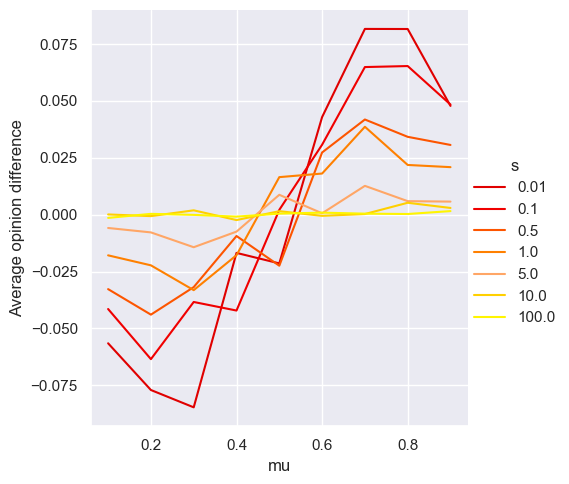

In [195]:
sns.set_theme()

sns.relplot(data = temp2,
            x = "mu", y = "Average opinion difference", hue = "s",
            kind="line", markers = True,
            height = 5, aspect = 1, legend = "full", palette = s_color_dict)

### Plot 2

In [196]:
temp = df.loc[(df["Step"].isin([0, 50])) & (df["strategy"] == 0.5), :].groupby(["mu", "s", "Step"])["Opinion"].std().reset_index()
temp2 = temp.copy()
temp2 = temp2.loc[temp["Step"] == 50, :]
temp2 = temp2.reset_index(drop = True)
temp2["Opinion STD difference"] = temp.loc[temp["Step"] == 50, "Opinion"].reset_index(drop = True) - temp.loc[temp["Step"] == 0, "Opinion"].reset_index(drop = True)

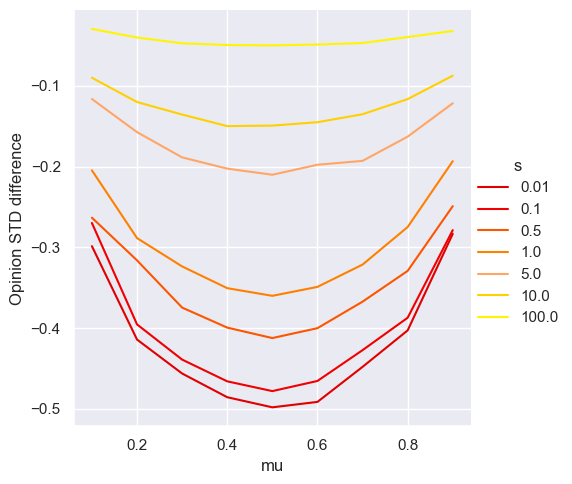

In [197]:
sns.set_theme()

sns.relplot(data = temp2,
            x = "mu", y = "Opinion STD difference", hue = "s",
            kind="line", markers = True,
            height = 5, aspect = 1, legend = "full", palette = s_color_dict)

### Plot 3

In [348]:
temp = df.loc[(df["Step"].isin([0, 50])) & (df["strategy"] == 0.5), :].groupby(["mu", "s", "Step", "AgentID"])["Opinion"].mean().reset_index()
temp

,mu,s,Step,AgentID,Opinion
0,0.1,0.01,0,0,6.040770e-251
1,0.1,0.01,0,1,1.000000e+00
2,0.1,0.01,0,2,1.048249e-82
3,0.1,0.01,0,3,4.558101e-283
4,0.1,0.01,0,4,3.598195e-50
...,...,...,...,...,...
125995,0.9,100.00,50,995,8.997449e-01
125996,0.9,100.00,50,996,8.997449e-01
125997,0.9,100.00,50,997,8.997449e-01
125998,0.9,100.00,50,998,8.997449e-01


<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
C:\Users\sdifi\AppData\Local\Temp\ipykernel_13648\3147333084.py:18: SyntaxWarning: invalid escape sequence '\m'
  plt.axvline(m, color = "g", label = "$\mu$")


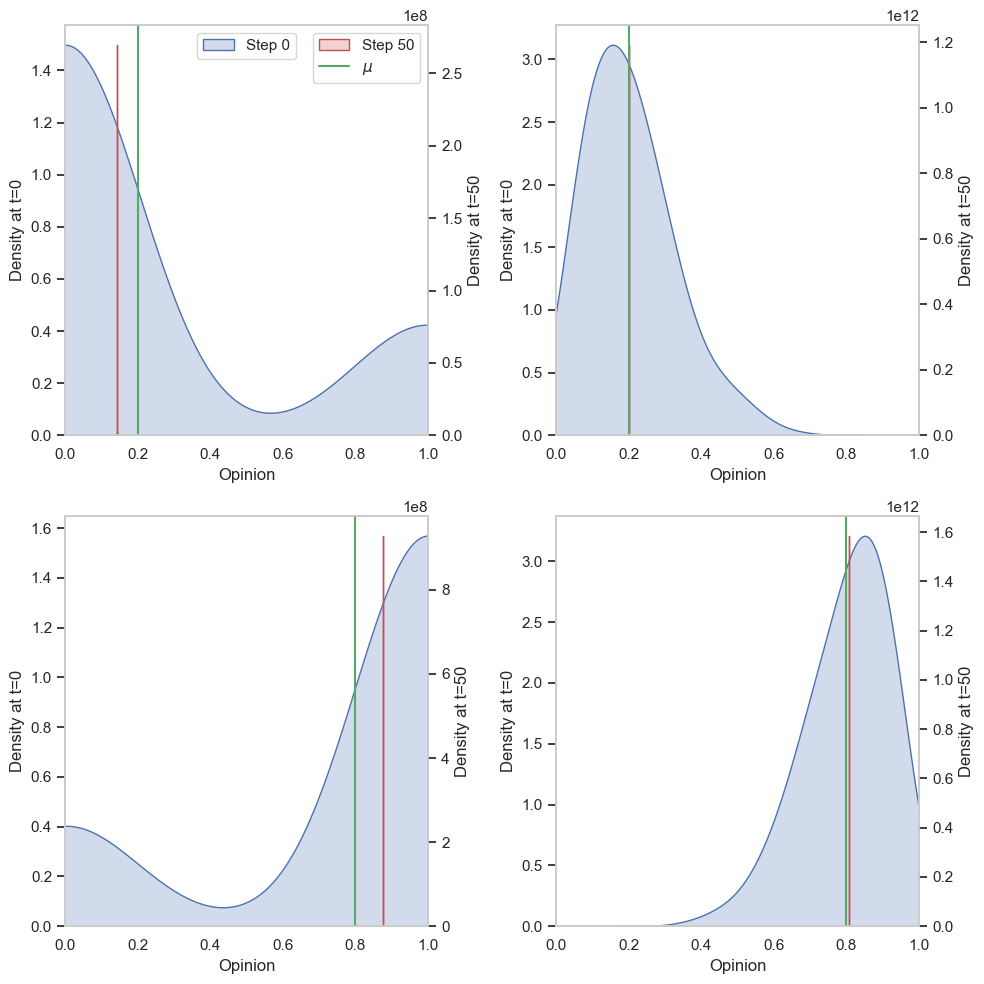

In [349]:
ms = [0.2, 0.8]
ss = [0.01, 10]

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10))
sns.set_style("whitegrid", {'axes.grid' : False})

for i in range(2):
    for j in range(2):
        m = ms[i]
        s = ss[j]
    
        conds = (temp["mu"] == m) & (temp["s"] == s)
        
        sns.kdeplot(temp.loc[conds & (temp["Step"] == 0), "Opinion"], bw_method = 0.5, ax = axes[i, j], fill=True, label = "Step 0")
        ax2 = axes[i, j].twinx()
        sns.kdeplot(temp.loc[conds & (temp["Step"] == 50), "Opinion"], bw_method = 0.5, ax = ax2, fill=True, color = "r", label = "Step 50")
        
        plt.axvline(m, color = "g", label = "$\mu$")
        
        axes[i, j].set_ylabel("Density at t=0")
        ax2.set_ylabel("Density at t=50")
        axes[i, j].set_xlim((0, 1))
        if i == 0 and j == 0:        
            axes[i, j].set_xlim((0, 1))
            axes[i, j].legend(loc = "upper center")
            ax2.legend(loc = "upper right")

plt.tight_layout()
plt.show()

### Plot 4 - 5 *

In [253]:
temp = df.loc[(df["Step"].isin([0, 50])), :].groupby(["mu", "s", "strategy", "Step"])["Opinion"].mean().reset_index()
temp2 = temp.copy()
temp2 = temp2.loc[temp["Step"] == 50, :]
temp2 = temp2.reset_index(drop = True)
temp2["Average opinion difference"] = temp.loc[temp["Step"] == 50, "Opinion"].reset_index(drop = True) - temp.loc[temp["Step"] == 0, "Opinion"].reset_index(drop = True)

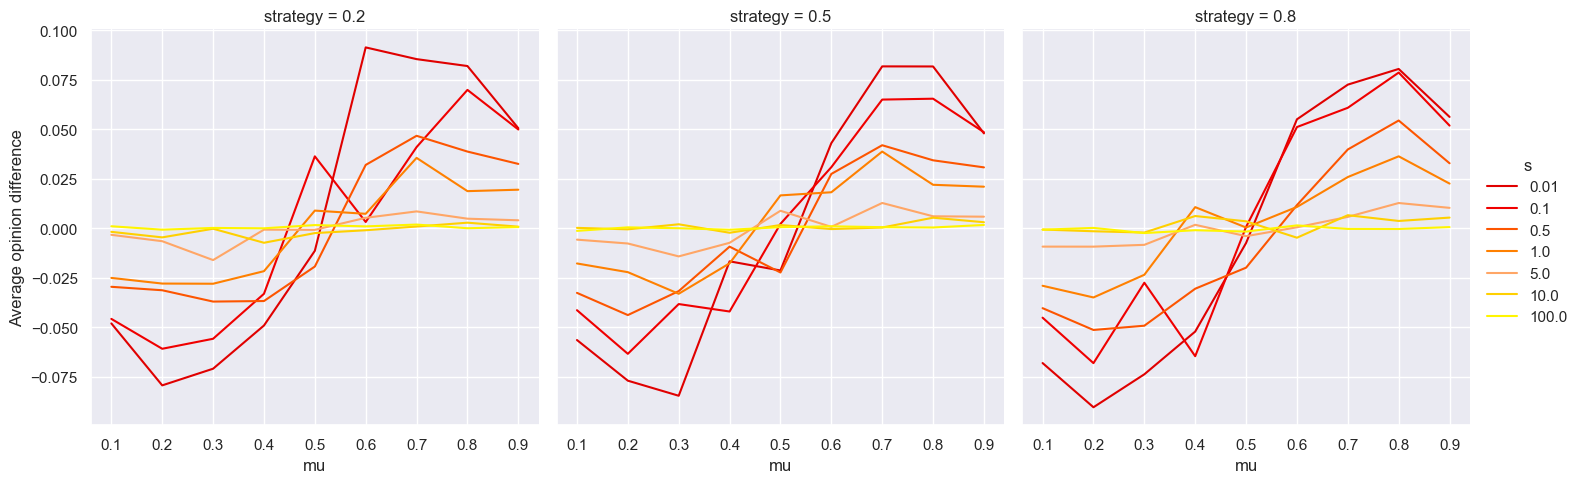

In [255]:
sns.set_theme()

sns.relplot(data = temp2, col = "strategy",
            x = "mu", y = "Average opinion difference", hue = "s",
            kind="line", markers = True,
            height = 5, aspect = 1, legend = "full", palette = s_color_dict)

In [257]:
temp = df.loc[(df["Step"].isin([0, 50])), :].groupby(["mu", "s", "strategy", "Step"])["Opinion"].std().reset_index()
temp2 = temp.copy()
temp2 = temp2.loc[temp["Step"] == 50, :]
temp2 = temp2.reset_index(drop = True)
temp2["Opinion STD difference"] = temp.loc[temp["Step"] == 50, "Opinion"].reset_index(drop = True) - temp.loc[temp["Step"] == 0, "Opinion"].reset_index(drop = True)

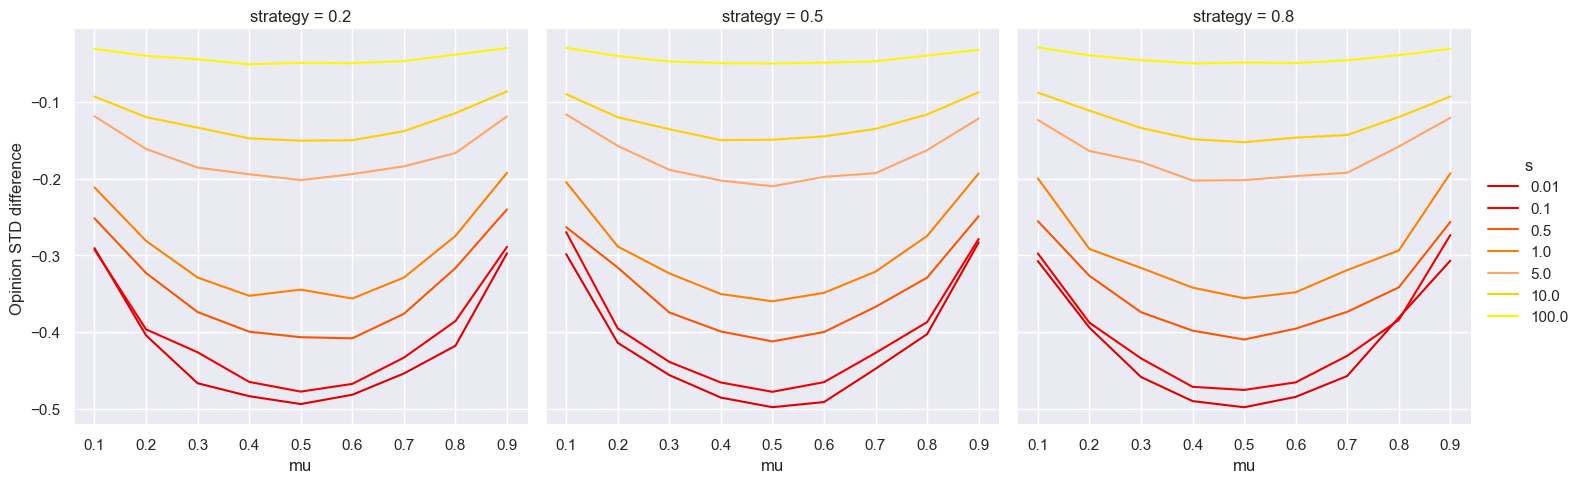

In [258]:
sns.set_theme()

sns.relplot(data = temp2, col = "strategy",
            x = "mu", y = "Opinion STD difference", hue = "s",
            kind="line", markers = True,
            height = 5, aspect = 1, legend = "full", palette = s_color_dict)

### Plot 6 - 7 *

In [272]:
temp = df.loc[(df["Step"].isin([0, 50])) & (df["strategy"] == 0.5), :].groupby(["mu", "s", "Step"])["Assortativity"].mean().reset_index()
temp2 = temp.copy()
temp2 = temp2.loc[temp["Step"] == 50, :]
temp2 = temp2.reset_index(drop = True)
temp2["Average assortativity difference"] = temp.loc[temp["Step"] == 50, "Assortativity"].reset_index(drop = True) - temp.loc[temp["Step"] == 0, "Assortativity"].reset_index(drop = True)

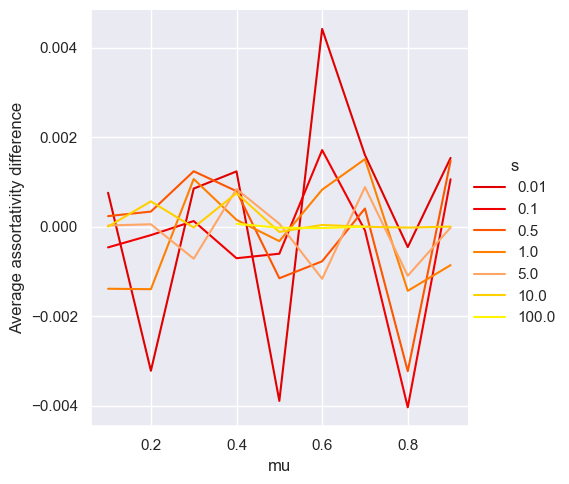

In [273]:
sns.set_theme()

sns.relplot(data = temp2,
            x = "mu", y = "Average assortativity difference", hue = "s",
            kind="line", markers = True,
            height = 5, aspect = 1, legend = "full", palette = s_color_dict)

In [276]:
temp = df.loc[(df["Step"].isin([0, 50])) & (df["strategy"] == 0.5), :].groupby(["mu", "s", "Step"])["Average degree"].mean().reset_index()
temp2 = temp.copy()
temp2 = temp2.loc[temp["Step"] == 50, :]
temp2 = temp2.reset_index(drop = True)
temp2["Average degree difference"] = temp.loc[temp["Step"] == 50, "Average degree"].reset_index(drop = True) - temp.loc[temp["Step"] == 0, "Average degree"].reset_index(drop = True)

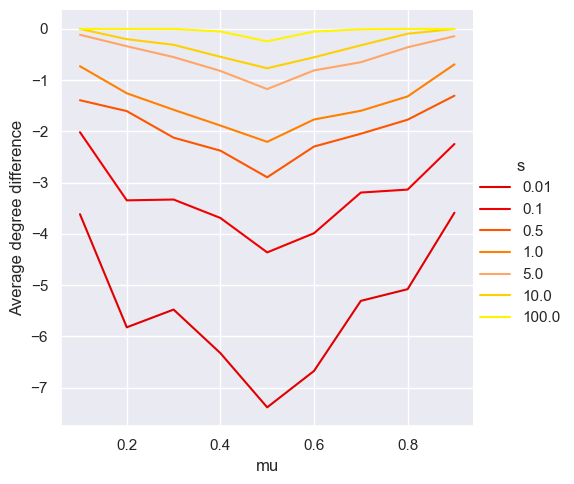

In [277]:
sns.set_theme()

sns.relplot(data = temp2,
            x = "mu", y = "Average degree difference", hue = "s",
            kind="line", markers = True,
            height = 5, aspect = 1, legend = "full", palette = s_color_dict)

## ER

In [279]:
df2 = pd.read_csv("df_er_n1000_k500_v1.csv", index_col = 0) #ER network with n = 1000, k = 500

In [280]:
df2.head()

,RunId,iteration,Step,mu,s,strategy,Assortativity,Average degree,links removed,AgentID,Opinion,Exposition
0,0,0,0,0.1,0.01,0.2,NaN,50.036,[],0,1.827150e-63,0.0
1,0,0,0,0.1,0.01,0.2,NaN,50.036,[],1,8.685920e-01,0.0
2,0,0,0,0.1,0.01,0.2,NaN,50.036,[],2,1.314618e-314,0.0
3,0,0,0,0.1,0.01,0.2,NaN,50.036,[],3,2.173848e-25,0.0
4,0,0,0,0.1,0.01,0.2,NaN,50.036,[],4,0.000000e+00,0.0


In [282]:
df2_params = {var:df2[var].unique() for var in ["mu", "s", "strategy"]}
df2_params

{'mu': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 's': array([1.e-02, 1.e-01, 5.e-01, 1.e+00, 5.e+00, 1.e+01, 1.e+02]),
 'strategy': array([0.2, 0.5, 0.8])}

### Plot 1:
x: $\mu$ \
y: average opinion change \
color: s \
FIX: strategy = 0.5

In [283]:
temp = df2.loc[(df2["Step"].isin([0, 50])) & (df2["strategy"] == 0.5), :].groupby(["mu", "s", "Step"])["Opinion"].mean().reset_index()
temp2 = temp.copy()
temp2 = temp2.loc[temp["Step"] == 50, :]
temp2 = temp2.reset_index(drop = True)
temp2["Average opinion difference"] = temp.loc[temp["Step"] == 50, "Opinion"].reset_index(drop = True) - temp.loc[temp["Step"] == 0, "Opinion"].reset_index(drop = True)

In [284]:
s_color_dict = {0.01: '#e00000', 0.1: '#f00000', 0.5: '#fd5500', 1: '#ff8000', 5: '#ffa666', 10: '#ffd000', 100: '#fff500'}

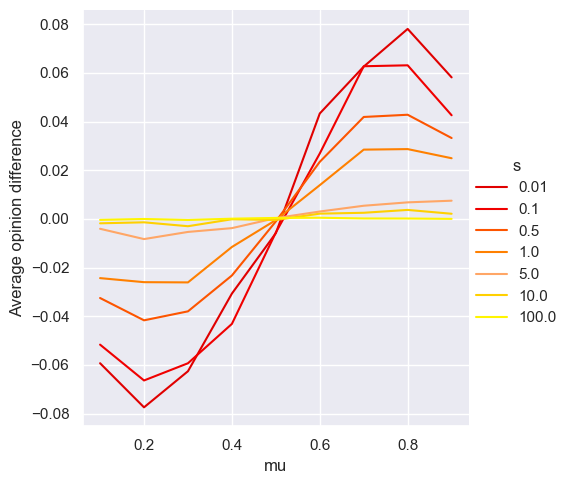

In [285]:
sns.set_theme()

sns.relplot(data = temp2,
            x = "mu", y = "Average opinion difference", hue = "s",
            kind="line", markers = True,
            height = 5, aspect = 1, legend = "full", palette = s_color_dict)

More uniform w.r.t AB (look around 0.5)

### Plot 2

In [287]:
temp = df2.loc[(df2["Step"].isin([0, 50])) & (df2["strategy"] == 0.5), :].groupby(["mu", "s", "Step"])["Opinion"].std().reset_index()
temp2 = temp.copy()
temp2 = temp2.loc[temp["Step"] == 50, :]
temp2 = temp2.reset_index(drop = True)
temp2["Opinion STD difference"] = temp.loc[temp["Step"] == 50, "Opinion"].reset_index(drop = True) - temp.loc[temp["Step"] == 0, "Opinion"].reset_index(drop = True)

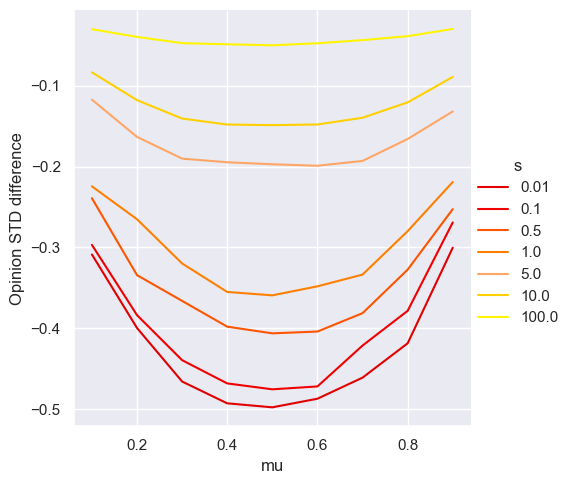

In [288]:
sns.set_theme()

sns.relplot(data = temp2,
            x = "mu", y = "Opinion STD difference", hue = "s",
            kind="line", markers = True,
            height = 5, aspect = 1, legend = "full", palette = s_color_dict)

Same as AB

### Plot 3

In [345]:
temp = df2.loc[(df2["Step"].isin([0, 50])) & (df2["strategy"] == 0.5), :].groupby(["mu", "s", "Step", "AgentID"])["Opinion"].mean().reset_index()
temp

,mu,s,Step,AgentID,Opinion
0,0.1,0.01,0,0,1.000000e+00
1,0.1,0.01,0,1,2.060377e-195
2,0.1,0.01,0,2,8.360048e-317
3,0.1,0.01,0,3,0.000000e+00
4,0.1,0.01,0,4,0.000000e+00
...,...,...,...,...,...
125995,0.9,100.00,50,995,8.990417e-01
125996,0.9,100.00,50,996,8.990417e-01
125997,0.9,100.00,50,997,8.990417e-01
125998,0.9,100.00,50,998,8.990417e-01


<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
C:\Users\sdifi\AppData\Local\Temp\ipykernel_13648\2168904986.py:18: SyntaxWarning: invalid escape sequence '\m'
  plt.axvline(m, color = "g", label = "$\mu$")


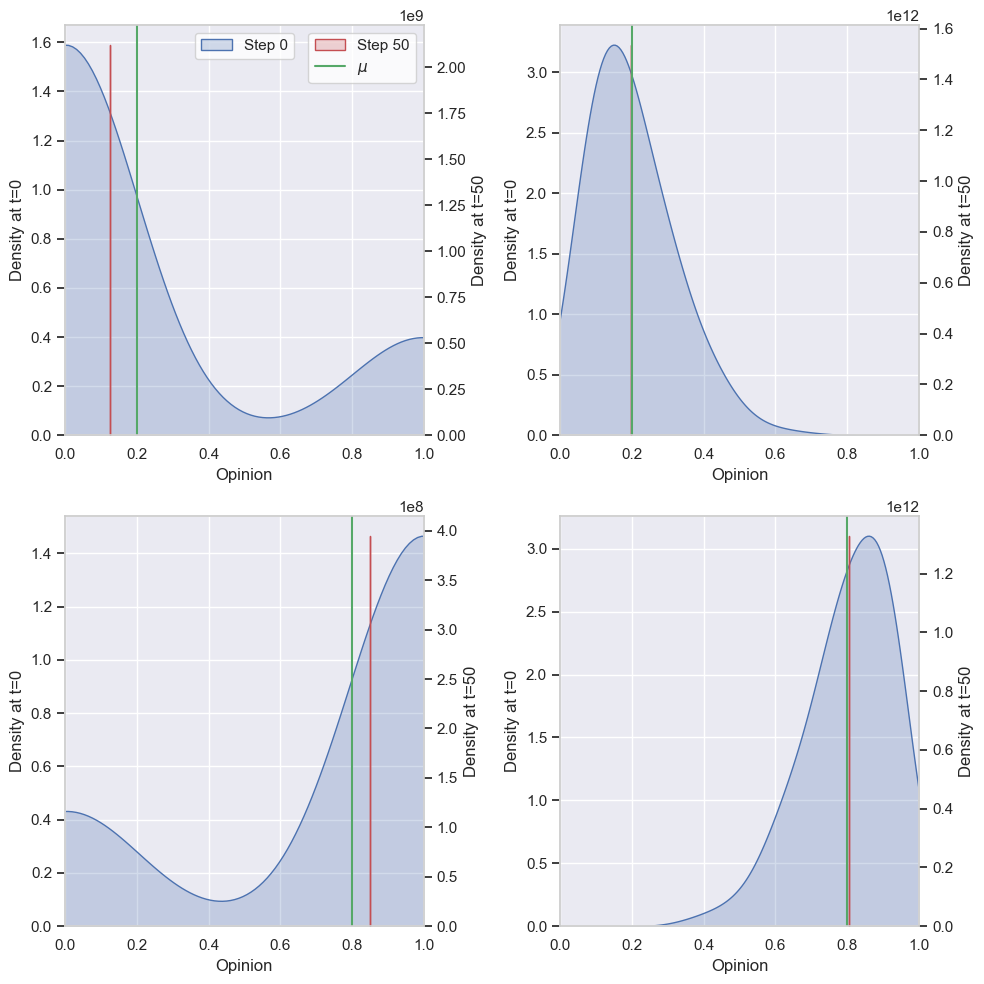

In [346]:
ms = [0.2, 0.8]
ss = [0.01, 10]

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10))
sns.set_style("whitegrid", {'axes.grid' : False})

for i in range(2):
    for j in range(2):
        m = ms[i]
        s = ss[j]
    
        conds = (temp["mu"] == m) & (temp["s"] == s)
        
        sns.kdeplot(temp.loc[conds & (temp["Step"] == 0), "Opinion"], bw_method = 0.5, ax = axes[i, j], fill=True, label = "Step 0")
        ax2 = axes[i, j].twinx()
        sns.kdeplot(temp.loc[conds & (temp["Step"] == 50), "Opinion"], bw_method = 0.5, ax = ax2, fill=True, color = "r", label = "Step 50")
        
        plt.axvline(m, color = "g", label = "$\mu$")
        
        axes[i, j].set_ylabel("Density at t=0")
        axes[i, j].set_xlim((0, 1))
        ax2.set_ylabel("Density at t=50")
        if i == 0 and j == 0:        
            axes[i, j].legend(loc = "upper center")
            ax2.legend(loc = "upper right")

plt.tight_layout()
plt.show()

Same as AB

In [318]:
temp = df2.loc[(df2["Step"].isin([0, 50])), :].groupby(["mu", "s", "strategy", "Step"])["Opinion"].mean().reset_index()
temp2 = temp.copy()
temp2 = temp2.loc[temp["Step"] == 50, :]
temp2 = temp2.reset_index(drop = True)
temp2["Average opinion difference"] = temp.loc[temp["Step"] == 50, "Opinion"].reset_index(drop = True) - temp.loc[temp["Step"] == 0, "Opinion"].reset_index(drop = True)

In [319]:
temp3 = df.loc[(df["Step"].isin([0, 50])), :].groupby(["mu", "s", "strategy", "Step"])["Opinion"].mean().reset_index()
temp4 = temp3.copy()
temp4 = temp4.loc[temp4["Step"] == 50, :]
temp4 = temp4.reset_index(drop = True)
temp4["Average opinion difference"] = temp3.loc[temp["Step"] == 50, "Opinion"].reset_index(drop = True) - temp3.loc[temp["Step"] == 0, "Opinion"].reset_index(drop = True)

In [321]:
temp5 = temp2.merge(temp4, on = ["mu", "s", "strategy", "Step"], suffixes = ["_ER", "_AB"], how = "inner")
temp5 = temp5.rename({"Average opinion difference_ER":"ER", "Average opinion difference_AB":"AB"}, axis = 1)

In [330]:
temp5 = pd.melt(temp5, id_vars=["mu", "s", "strategy", "Step"], value_vars=['ER', 'AB'], 
        var_name='network', value_name='Average opinion difference')

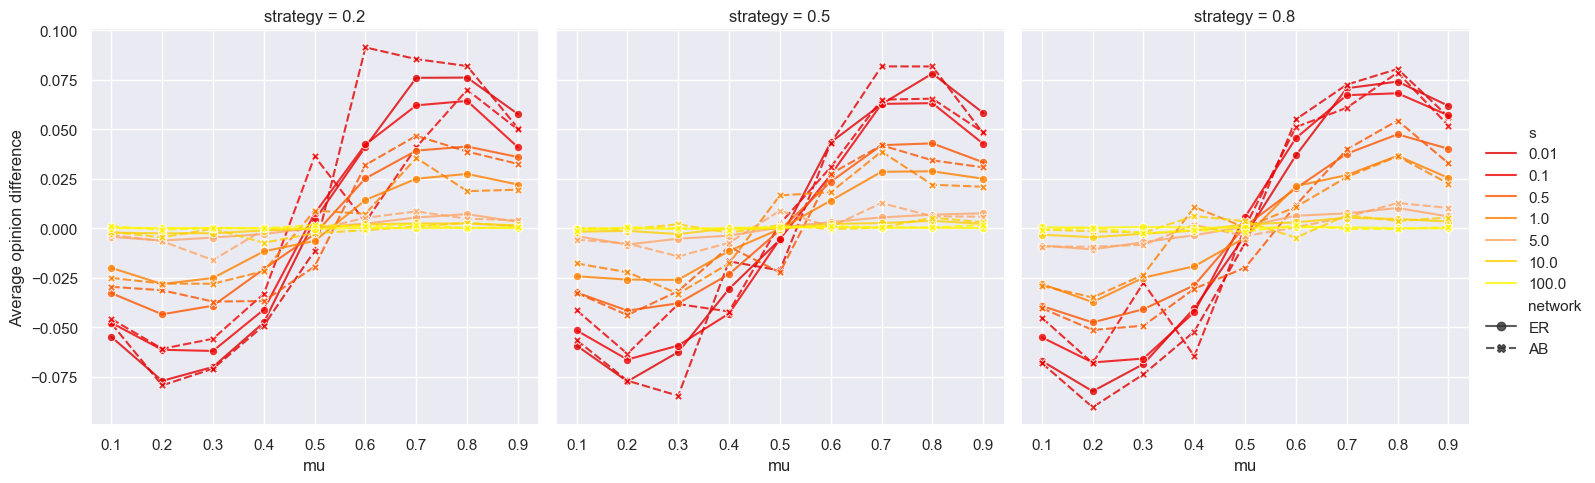

In [335]:
sns.set_theme()

sns.relplot(data = temp5, col = "strategy", style = "network",
            x = "mu", y = "Average opinion difference", hue = "s",
            kind="line", markers = True,
            height = 5, aspect = 1, legend = "full", palette = s_color_dict, alpha = 0.8)



In [336]:
temp = df2.loc[(df2["Step"].isin([0, 50])), :].groupby(["mu", "s", "strategy", "Step"])["Opinion"].std().reset_index()
temp2 = temp.copy()
temp2 = temp2.loc[temp["Step"] == 50, :]
temp2 = temp2.reset_index(drop = True)
temp2["Opinion STD difference"] = temp.loc[temp["Step"] == 50, "Opinion"].reset_index(drop = True) - temp.loc[temp["Step"] == 0, "Opinion"].reset_index(drop = True)

In [337]:
temp3 = df.loc[(df["Step"].isin([0, 50])), :].groupby(["mu", "s", "strategy", "Step"])["Opinion"].std().reset_index()
temp4 = temp3.copy()
temp4 = temp4.loc[temp4["Step"] == 50, :]
temp4 = temp4.reset_index(drop = True)
temp4["Opinion STD difference"] = temp3.loc[temp["Step"] == 50, "Opinion"].reset_index(drop = True) - temp3.loc[temp["Step"] == 0, "Opinion"].reset_index(drop = True)

In [338]:
temp5 = temp2.merge(temp4, on = ["mu", "s", "strategy", "Step"], suffixes = ["_ER", "_AB"], how = "inner")
temp5 = temp5.rename({"Opinion STD difference_ER":"ER", "Opinion STD difference_AB":"AB"}, axis = 1)

In [339]:
temp5 = pd.melt(temp5, id_vars=["mu", "s", "strategy", "Step"], value_vars=['ER', 'AB'], 
        var_name='network', value_name='Opinion STD difference')

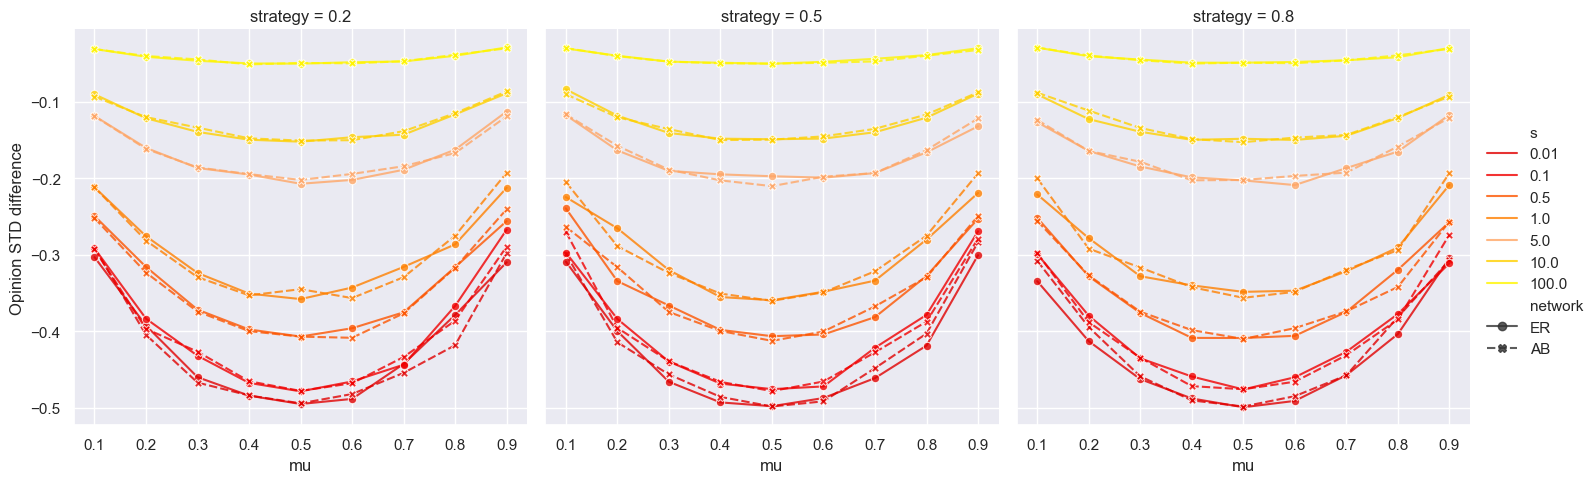

In [340]:
sns.set_theme()

sns.relplot(data = temp5, col = "strategy", style = "network",
            x = "mu", y = "Opinion STD difference", hue = "s",
            kind="line", markers = True,
            height = 5, aspect = 1, legend = "full", palette = s_color_dict, alpha = 0.8)



### Plot 6 - 7 *

In [341]:
temp = df2.loc[(df2["Step"].isin([0, 50])) & (df2["strategy"] == 0.5), :].groupby(["mu", "s", "Step"])["Assortativity"].mean().reset_index()
temp2 = temp.copy()
temp2 = temp2.loc[temp["Step"] == 50, :]
temp2 = temp2.reset_index(drop = True)
temp2["Average assortativity difference"] = temp.loc[temp["Step"] == 50, "Assortativity"].reset_index(drop = True) - temp.loc[temp["Step"] == 0, "Assortativity"].reset_index(drop = True)

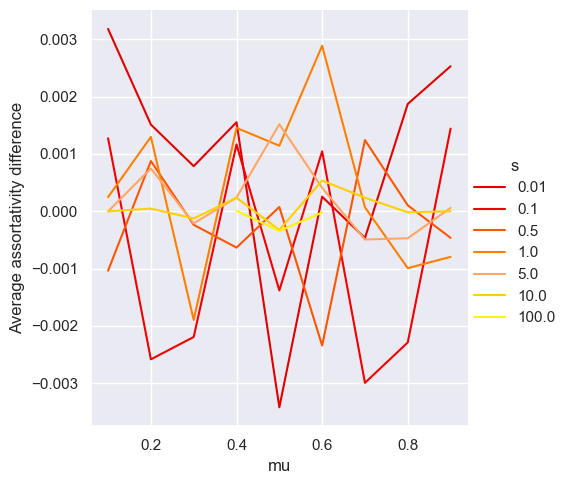

In [342]:
sns.set_theme()

sns.relplot(data = temp2,
            x = "mu", y = "Average assortativity difference", hue = "s",
            kind="line", markers = True,
            height = 5, aspect = 1, legend = "full", palette = s_color_dict)

In [343]:
temp = df2.loc[(df2["Step"].isin([0, 50])) & (df2["strategy"] == 0.5), :].groupby(["mu", "s", "Step"])["Average degree"].mean().reset_index()
temp2 = temp.copy()
temp2 = temp2.loc[temp["Step"] == 50, :]
temp2 = temp2.reset_index(drop = True)
temp2["Average degree difference"] = temp.loc[temp["Step"] == 50, "Average degree"].reset_index(drop = True) - temp.loc[temp["Step"] == 0, "Average degree"].reset_index(drop = True)

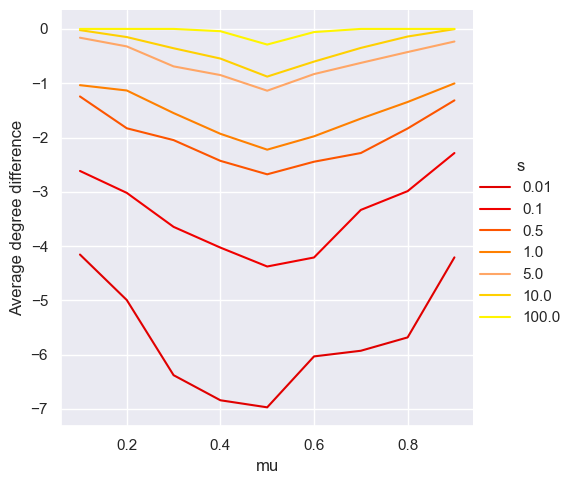

In [344]:
sns.set_theme()

sns.relplot(data = temp2,
            x = "mu", y = "Average degree difference", hue = "s",
            kind="line", markers = True,
            height = 5, aspect = 1, legend = "full", palette = s_color_dict)